In [35]:
import pandas as pd
import time

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay


In [36]:
# load data
df = pd.read_csv('../data/BGL_cleaned.csv')

## Split Data to Training Set and Test Set

In [37]:
# train test split
X = df['info']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Word of Bags Method

In [38]:
vectorizer = CountVectorizer()
train_count = vectorizer.fit_transform(X_train)
test_count = vectorizer.transform(X_test)

## Logistic Regression

In [39]:
start_time = time.time()

logReg = LogisticRegression(max_iter=300,class_weight='balanced')
logReg.fit(train_count, y_train)

print("### %s seconds ###" % (time.time() - start_time))

### 43.4563467502594 seconds ###


In [40]:
pred_test = logReg.predict(test_count)
pred_prob = logReg.predict_proba(test_count)
print("Log loss on test set is:",metrics.log_loss(y_test, pred_prob))
print("Accuracy Score on test set is:",metrics.accuracy_score(y_test, pred_test))

Log loss on test set is: 9.944267565485283e-05
Accuracy Score on test set is: 0.999994894142816


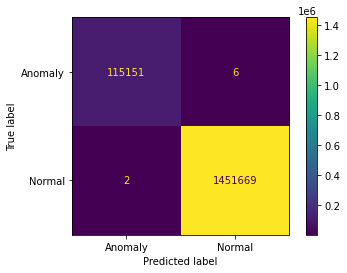

In [41]:
cm = ConfusionMatrixDisplay.from_estimator(
    logReg, test_count, y_test, values_format="d", display_labels=["Anomaly", "Normal"]
)

In [42]:
print(classification_report(y_test, pred_test, target_names=["Anomaly", "Normal"], digits=5))

              precision    recall  f1-score   support

     Anomaly    0.99998   0.99995   0.99997    115157
      Normal    1.00000   1.00000   1.00000   1451671

    accuracy                        0.99999   1566828
   macro avg    0.99999   0.99997   0.99998   1566828
weighted avg    0.99999   0.99999   0.99999   1566828



Logistic regression was the first model that we constructed. Each label was considered independent in this approach, therefore, we fed as input the converted comments by word of bags and use sklearn's default LogisticRegression package trained a model on training data. The total training time for training model around 18s. Predictions on test were comparable but in order to solve overfitting, there was still scope for improvement. A test accuracy of 0.999989 was obtained and log loss on test set is 0.00009917.

## Naive Bayes

In [43]:
#Tuning parameter alpha
alpha = [0.01, 0.015, 0.1, 0.5, 1]

start_time = time.time()


for i in alpha:
    nb = MultinomialNB(alpha = i)
    nb.fit(train_count, y_train)
    pred_test = nb.predict(test_count)
    pred_prob = nb.predict_proba(test_count)
    print("When alpha value is ", i,", Log loss on test set is:",metrics.log_loss(y_test, pred_prob))
    print("When alpha value is ", i,", Accuracy Score on test set is:",metrics.accuracy_score(y_test, pred_test))

    
print("### %s seconds ###" % str((time.time() - start_time)/len(alpha)))

When alpha value is  0.01 , Log loss on test set is: 0.0168354131474122
When alpha value is  0.01 , Accuracy Score on test set is: 0.9987809765973036
When alpha value is  0.015 , Log loss on test set is: 0.016980711594519065
When alpha value is  0.015 , Accuracy Score on test set is: 0.9987809765973036
When alpha value is  0.1 , Log loss on test set is: 0.017714921099963005
When alpha value is  0.1 , Accuracy Score on test set is: 0.9986960917216184
When alpha value is  0.5 , Log loss on test set is: 0.01844655275583625
When alpha value is  0.5 , Accuracy Score on test set is: 0.9986794976857702
When alpha value is  1 , Log loss on test set is: 0.01882955439098886
When alpha value is  1 , Accuracy Score on test set is: 0.9986539683998499
### 23.278864765167235 seconds ###


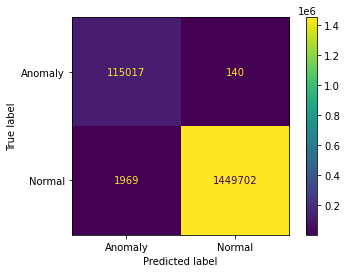

In [44]:
cm = ConfusionMatrixDisplay.from_estimator(
    nb, test_count, y_test, values_format="d", display_labels=["Anomaly", "Normal"]
)

In [45]:
print(classification_report(y_test, pred_test, target_names=["Anomaly", "Normal"], digits=5))

              precision    recall  f1-score   support

     Anomaly    0.98317   0.99878   0.99092    115157
      Normal    0.99990   0.99864   0.99927   1451671

    accuracy                        0.99865   1566828
   macro avg    0.99154   0.99871   0.99509   1566828
weighted avg    0.99867   0.99865   0.99866   1566828



Our second model is Naive Bayes. To do this, we fed as input the converted comments by word of bags into sklearn's naive_bayes package. The approximately average training time for each model is 16s. We tune the alpha parameter and found there is not much difference between each alpha value. Finally achieved an accuracy score 0.99878 on test set and the log loss is 0.016835.

## Random Forest

In [46]:
start_time = time.time()

clf = RandomForestClassifier()
clf.fit(train_count, y_train)

print("### %s seconds ###" % (time.time() - start_time))

### 108.07582569122314 seconds ###


In [47]:
pred_test = clf.predict(test_count)
pred_prob = clf.predict_proba(test_count)
print("Log loss on test set is:",metrics.log_loss(y_test, pred_prob))
print("Accuracy Score on test set is:",metrics.accuracy_score(y_test, pred_test))

Log loss on test set is: 1.1028796768707202e-05
Accuracy Score on test set is: 0.999995532374964


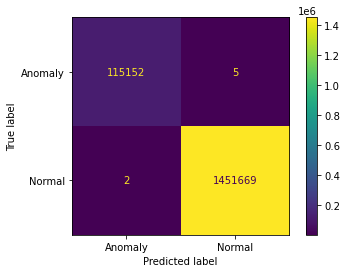

In [48]:
cm = ConfusionMatrixDisplay.from_estimator(
    clf, test_count, y_test, values_format="d", display_labels=["Anomaly", "Normal"]
)

In [49]:
print(classification_report(y_test, pred_test, target_names=["Anomaly", "Normal"], digits=5))

              precision    recall  f1-score   support

     Anomaly    0.99998   0.99996   0.99997    115157
      Normal    1.00000   1.00000   1.00000   1451671

    accuracy                        1.00000   1566828
   macro avg    0.99999   0.99998   0.99998   1566828
weighted avg    1.00000   1.00000   1.00000   1566828



The third model is random froest, which is a classification algorithm consisting of many decisions trees. The total training time is around 92s, which is much longer than logistic and naive bayes because it uses bagging and feature randomness when building each individual tree. Random forest is robust to overfitting. The log loss on test set is 0.0000098448 and the accuracy score on test set is 0.99999.

## Summary

| Model               | Training Time | Log Loss     | Accuracy Score |
|---------------------|---------------|--------------|----------------|
| Logistic Regression | 18s           | 0.00009917   | 0.999989       |
| Naive Bayes         | 16s           | 0.016835     | 0.998781       |
| Random Forest          | 92s           | 0.0000098448 | 0.999995       |

Among the three models, we can see that Random Forest has the best performance.